In [ ]:
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers import LeakyReLU

%matplotlib inline

In [ ]:
dataset_path = "/content/drive/MyDrive/3rd Year Project/NDWI/Dataset"
data_dir = pathlib.Path(dataset_path)

In [ ]:
batch_size = 32
img_height = 1024
img_width = 1024

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=100,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 544 files belonging to 2 classes.
Using 381 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=100,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 544 files belonging to 2 classes.
Using 163 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Lake', 'River']


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(
            img_height, img_width, 3)),
        layers.RandomCrop(512, 512),
        layers.RandomRotation(
            (-0.01, 0.99), fill_mode='reflect', interpolation='bilinear'),
        layers.RandomZoom(height_factor=(0.01, 0.99), width_factor=(
            0.01, 0.99), fill_mode='reflect', interpolation='bilinear'),
        layers.RandomZoom(height_factor=(-0.01, -0.99), width_factor=(-0.01, -
                                                                      0.99), fill_mode='reflect', interpolation='bilinear'),
    ]
)

In [ ]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Conv2D(1024, 3, padding='same', activation=layers.LeakyReLU(alpha=0.05)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation=layers.LeakyReLU(alpha=0.05)),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True
    ),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                  

In [ ]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
12/12 [==============================] - 105s 4s/step - loss: 0.9690 - accuracy: 0.5906 - val_loss: 0.6415 - val_accuracy: 0.6258
Epoch 2/50
12/12 [==============================] - 17s 1s/step - loss: 0.9764 - accuracy: 0.7087 - val_loss: 1.1287 - val_accuracy: 0.6687
Epoch 3/50
12/12 [==============================] - 17s 1s/step - loss: 0.6793 - accuracy: 0.6352 - val_loss: 0.6407 - val_accuracy: 0.6319
Epoch 4/50
12/12 [==============================] - 17s 1s/step - loss: 0.5396 - accuracy: 0.7795 - val_loss: 0.3744 - val_accuracy: 0.8896
Epoch 5/50
12/12 [==============================] - 17s 1s/step - loss: 0.4705 - accuracy: 0.8189 - val_loss: 0.5461 - val_accuracy: 0.7117
Epoch 6/50
12/12 [==============================] - 17s 1s/step - loss: 0.5220 - accuracy: 0.7743 - val_loss: 0.4194 - val_accuracy: 0.8282
Epoch 7/50
12/12 [==============================] - 17s 1s/step - loss: 0.5971 - accuracy: 0.6745 - val_loss: 0.5359 - val_accuracy: 0.7178
Epoch 8/50
12/12 [=

In [ ]:
model.save(
    "/content/drive/MyDrive/3rd Year Project/NDWI/Model/NDWI_Rivers_Lakes_Trained_Model.h5")

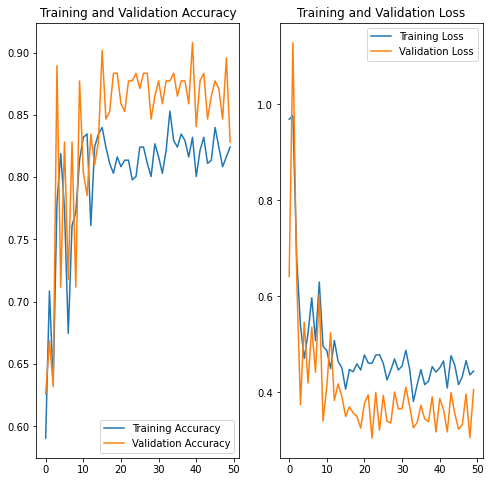

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()